# Mining Data with Probability and Statistics

Highly recommended read on probability: https://www.feynmanlectures.caltech.edu/I_06.html

Based on the book "Cracking the Data Science Interview" by Leondra R. Gonzalez and Aaren Stubberfield.

## Overview
1. Describing data with descriptive statistics
    * 1.1. Measuring the central tendency of a dataset
    * 1.2. Measuring Variability
2. Introducing populations and samples
3. The Central Limit Thereom (CLT)
    * 3.1. Demonstrating the assumption of normality
4. Probability Distribution Functions
    * 4.1. Uniform Distribution
    * 4.2. Normal distribution
        * 4.2.1. Monte Carlo simulation (+ example for pi calculation)
    * 4.3. Student’s t-distribution
    * 4.4. Binomial distribution
    * 4.5. Poisson distribution
    * 4.6. Exponential distribution
    * 4.7. Geometric distribution
    * 4.8. Weibull distribution
    * 4.9. Summary of Probability Distribution Functions
5. Hypothesis Testing
    * 5.1. One-sample t-test
    * 5.2. Two-sample t-test
    * 5.3. Paired sample t-test
    * 5.4. ANOVA and MANOVA
    * 5.5. Chi-square test (χ² test)
    * 5.6. A/B tests
6. Type I and Type II errors

In [2]:
# Import necessary libraries
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, binom, poisson, expon, geom, f_oneway, chi2_contingency
from statsmodels.multivariate.manova import MANOVA
from sklearn.datasets import load_iris

np.random.seed(1997)  # seed to make the random numbers reproducible

# Main data directory
mainpath="../data/"

## 1. Describing data with descriptive statistics
Descriptive statistics are values that summarize the characteristics of a dataset. Before working on a project, data scientists use descriptive statistics to better understand the dataset they are working with.

### 1.1. Measuring the central tendency of a dataset
Measures of central tendency provide a snapshot of a dataset’s typical or central value, helping us to understand where data tends to cluster.

When discussing measuring centrality, we often use measures such as mean, median, and mode:
* Mean: The average of all values in a dataset.
* Median: The middle value of a dataset.
* Mode: The most frequently occurring value in a dataset.

When we should use the mean over the median and vice versa? When the distribution is hihly skewed. In these situations, you will want to use the median, which provides a measure of centrality that is not influenced by outliers as much as the mean.

### 1.2. Measuring Variability
Variability is the measure of the spread or dispersion of data points. In short, variability provides insights into how data points deviate from the central tendency. 
Three commonly used measures are as follows:
* Range: The difference between the maximum and minimum values in a dataset.
* Interquartile range (IQR): The difference between the first and third quartiles. In other words, IQR is the range of the middle 50% of the data set. The IQR is less sensitive to outliers than the range and is often used to summarize skewed data.
* Variance: The average of the squared differences from the mean.
* Standard deviation, σ: the data’s standardized distance (or deviation)
from the mean of the dataset. It is a more robust measure of variability than the range as it considers how every value in the dataset contributes to the dispersion. It is the square root of the variance (σ2).

In [3]:
filepath = "employees/Employee_Salary_Dataset.csv"
fullpath = os.path.join(mainpath, filepath)
data = pd.read_csv(fullpath)  # Load the data

print(data.shape)  # Show the dimensions of the data
data.head() # Show the first 5 rows of the data

(59, 6)


,ID,Experience_Years,Age,Gender,Salary,Type
0,1,5,28,Female,250000,Employee
1,2,1,21,Male,50000,Employee
2,3,3,23,Female,170000,Employee
3,4,2,22,Male,25000,Employee
4,5,1,17,Male,10000,Employee


Suppose you are working with a dataset containing the salaries of employees in a large organization. The CEO's salary is significantly higher than everyone else's, causing a skew in the salary distribution.

Which measure of central tendency (mean, median, or mode) would be most appropriate to represent a "typical" employee's salary, and why?

The median would be the most appropriate measure of central tendency to represent a "typical" employee's salary. In this case, the CEO's salary is an outlier that would skew the mean. The median is less sensitive to outliers than the mean, making it a more appropriate measure of centrality in this scenario.

In [4]:
stat_description = data.describe()  # Show the summary statistics of the data
stat_description

,ID,Experience_Years,Age,Salary
count,59.000000,59.000000,59.000000,5.900000e+01
mean,30.000000,7.932203,33.135593,1.753461e+06
std,17.175564,6.759066,13.626113,2.937862e+06
min,1.000000,1.000000,17.000000,3.000000e+03
25%,15.500000,2.000000,22.000000,1.500000e+04
50%,30.000000,5.000000,28.000000,1.700000e+05
75%,44.500000,14.000000,40.000000,1.400000e+06
max,59.000000,27.000000,62.000000,1.000000e+07


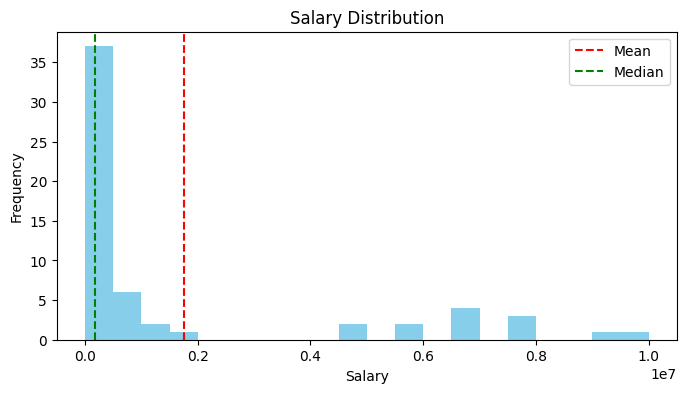

In [5]:
# plot salary distribution
plt.figure(figsize=(8, 4))
plt.hist(data['Salary'], bins=20, color='skyblue')
plt.title('Salary Distribution')

plt.axvline(x = data['Salary'].mean(), color = 'r', label = 'Mean', linestyle = 'dashed')
plt.axvline(x = data['Salary'].median(), color = 'g', label = 'Median', linestyle = 'dashed')

plt.legend()
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

## 2. Introducing populations and samples
Statistics is the art of extracting meaningful insights from data, and it all begins with a thorough understanding of populations and samples.

Understanding these concepts is important because they form the basis for generalizing observations from a subset of data to a larger group.

* **Population** refers to the entire group of individuals, objects, or events that we are interested in studying. Studying an entire population is often impractical or impossible due to factors such as time, cost, or accessibility. This is where samples come into play.
* A **sample** is a subset of the population that we select to represent the larger group. By randomly selecting and analyzing a sample, we can draw meaningful conclusions about the population as a whole. 

In data science, we are almost always working on a dataset that represents the sample of a larger population. The key to reliable statistical analysis lies in the **representativeness of the sample**.

**Sampling bias** occurs when we do not acquire a representative sample.

The **sampling error**, also known as the standard error of a sample, is the natural variation that occurs between different samples from the same population.

To mitigate the impact of the sampling error, we can increase the sample size and number of samples.

The standard error is calculated as the standard deviation of the population statistic divided by the square root of the sample size. Mathematically, it can be represented as follows:

$$SE = \frac{\sigma}{\sqrt{n}}$$

where:
* SE is the standard error,
* σ is the standard deviation of the population, and
* n is the sample size.

Understanding the sampling error enables us to quantify the uncertainty in our estimates and make reliable inferences.


__EXAMPLE__:

In the data folder we have a dataset containing the proportion of people in each state who identify with one one political party or the other. This dataset was built asking random people which party they identify or affiliate with.

The most obvious source of error in the data is the finite sample size – they did not poll everybody in America, and thus the party affilitions are subject to sampling errors. 

How much uncertainty does this introduce? Lets **estimate the sampling error** using the definition of the standard error (we use N-1 rather than N).

In [10]:
filepath = "us-elections-2012/Party_Affiliation_by_State.csv"
fullpath = os.path.join(mainpath, filepath)
data = pd.read_csv(fullpath).set_index('State')

data.head()

,Democrat/Lean Dem (%),Republican/Lean Rep (%),Democratic Advantage (ppt.),N,Unknown
State,,,,,
District of Columbia,79.0,12.7,66.3,416.0,8.3
Rhode Island,52.5,26.5,26.0,623.0,21.0
Hawaii,54.3,28.7,25.6,466.0,17.0
New York,52.0,30.8,21.2,8674.0,17.2
Maryland,54.0,33.8,20.2,3571.0,12.2


In [11]:
data["SE_percentage"]=100.0*np.sqrt((data["Democrat/Lean Dem (%)"]/100.)*((100. - data["Democrat/Lean Dem (%)"])/100.)/(data["N"] -1))
print(data["SE_percentage"].mean())
data.head()

1.1123257160226878


,Democrat/Lean Dem (%),Republican/Lean Rep (%),Democratic Advantage (ppt.),N,Unknown,SE_percentage
State,,,,,,
District of Columbia,79.0,12.7,66.3,416.0,8.3,1.999397
Rhode Island,52.5,26.5,26.0,623.0,21.0,2.002310
Hawaii,54.3,28.7,25.6,466.0,17.0,2.310104
New York,52.0,30.8,21.2,8674.0,17.2,0.536460
Maryland,54.0,33.8,20.2,3571.0,12.2,0.834145


## 3. The Central Limit Thereom (CLT)

The CLT states that regardless of the shape of the original population distribution, if we repeatedly take samples from that population and each sample is sufficiently large, the distribution of the sample means will approximate a normal distribution.

The CLT enables us to estimate the population mean with greater accuracy.

The CLT also allows us to accept the assumption of normality, which allows us to rely on the normal
distribution of sample means, even when the population distribution is not normal.

Many parametric hypothesis tests (such as t-tests and z-tests) rely on the assumption of normality to make valid inferences. These tests assume that the population from which the sample is drawn follows a normal distribution. The CLT comes into play by allowing us to approximate the distribution of the test statistic to a normal distribution, even when the population distribution is not strictly normal. This approximation enables us to perform these tests and make reliable conclusions.

### 3.1. Demonstrating the assumption of normality

Let’s conduct an experiment where we roll a dice repeatedly. We will be using a fair six-sided dice, meaning that the dice has not been altered, and there is an equal chance that when rolled, it might land on any of its six values. Since there is an equal chance of rolling any of the values on the dice, this is considered a uniform distribution.

In [12]:
def dice_roll_exp(n):
    """Roll a dice n times and compute the mean of the rolls.

    Args:
        n (int): _description_

    Returns:
        int: average of the dice rolls
    """
    roll_n_times = np.random.randint(1, 7, n)
    return np.mean(roll_n_times)

def repeat_dice_roll_exp(rolls, exp_reps):
    """Repeat the dice roll experiment m times.

    Args:
        rolls (int): number of times to roll the dice in each experiment
        exp_reps (int): number of times to repeat the experiment

    Returns:
        list: list of the average of the dice rolls
    """
    return [float(dice_roll_exp(rolls)) for _ in range(exp_reps)]

averages = repeat_dice_roll_exp(rolls = 5, exp_reps = 10)
print(averages)

[3.4, 3.8, 3.4, 3.8, 2.8, 3.8, 3.2, 1.8, 3.0, 3.2]


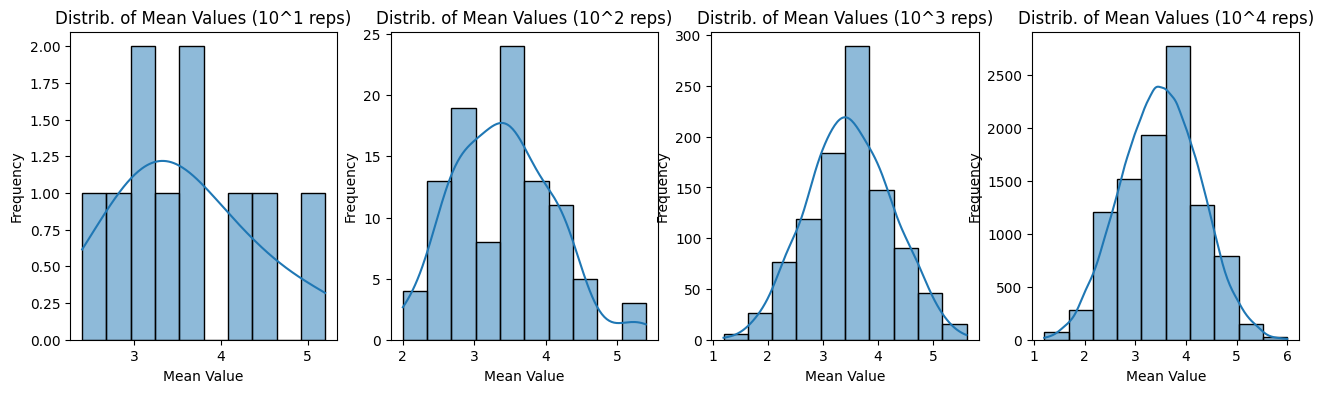

In [19]:
plt.figure(figsize=(20, 4))

n_subplots = 5
for i in range(n_subplots-1):
    plt.subplot(1, n_subplots, i+1)
    averages = repeat_dice_roll_exp(rolls = 5, exp_reps = 10**(i+1))
    sns.histplot(averages, bins=10, kde=True)
    plt.xlabel('Mean Value')
    plt.ylabel('Frequency')
    plt.title(f'Distrib. of Mean Values (10^{i+1} reps)')

# As we increase the number of repetitions, the distribution of the mean values becomes more normal.

The **assumption of normality** in statistical analysis is closely linked to the CLT. According to the CLT,
even if the population distribution is not normal, as the number of data points in each sample increases,
the distribution of the sample means will approximate a normal distribution.

## 4. Probability Distribution Functions

Theoretical distributions (such as those discussed in this section) are a way to describe the central tendency and variability of a given numerical variable. Depending on the situation, it's often more appropriate to use one distribution over the other.

Probability distributions are fundamental concepts in statistics and probability theory that describe the likelihood of different outcomes in a random experiment or process. In the world of data science, these distributions play a critical role in modeling and understanding uncertainty.

### 4.1. Uniform distribution

A uniform distribution is a type of probability distribution in which all outcomes are equally likely.

It may be too simplistic for complex phenomena in the real world.

Text(0, 0.5, 'Frequency')

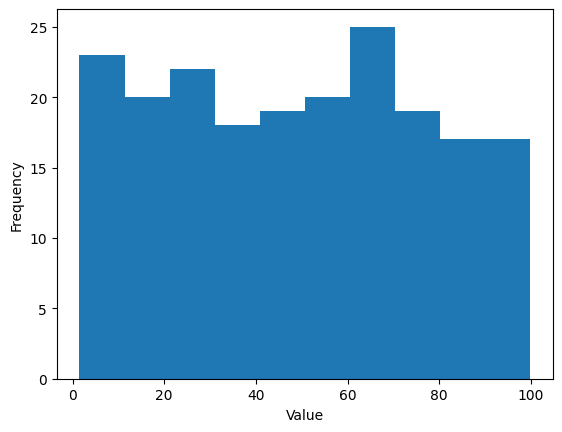

In [20]:
# In python we can use this distibution to generate random numbers. 
# This way we can generate random numbers that have the same probability of appearing
lower_bound = 1
upper_bound = 100
n = 200  # number of random numbers to generate
data  =np.random.uniform(lower_bound, upper_bound, n)  # using a uniform distribution

plt.hist(data)
plt.xlabel("Value")
plt.ylabel("Frequency")

### 4.2. Gauss or Normal distribution

The **Gaussian distribution**, also known as the **normal distribution** or **Z distribution**, is a bell-shaped distribution that is symmetric about the mean, with most observations falling close to the mean and fewer observations farther from it.


The **z-score** is a standardized value that measures how many standard deviations a given data point is from the mean. It allows us to convert any value from a normal distribution to the corresponding value on the standard normal distribution, making it a useful tool for probability calculations. 

Here is the z-score formula:

Z = (X - μ) / σ

Where:
 * Z is the standard score or Z-score
 * X is the raw score to be standardized
 * μ is the mean of the population
 * σ is the standard deviation of the population

Let’s consider an example of adult male heights. The heights of adult males in a given population often follow a normal distribution. Suppose the mean height is 175 cm and the standard deviation is 6 cm. 

Using python and the normal distribution, let's calculate the probability of finding a male with a height between 170 cm and 180 cm:

**Note:** Cumulative probability is the area under the curve of the normal distribution from the far left (negative infinity) up to a specific point. It represents the probability that a random value will be less than or equal to that point.

In [21]:
# Parameters of the normal distribution
mean_height = 175  # cm
std_height = 6  # cm

# Heights between which we want to calculate the probability
lower_bound = 170  # cm
upper_bound = 180  # cm

# Calculate the cumulative probabilities for the bounds
prob_lower = norm.cdf(lower_bound, mean_height, std_height)  # cdf = cumulative distribution function
prob_upper = norm.cdf(upper_bound, mean_height, std_height)

# Probability of being between the bounds
probability = prob_upper - prob_lower
probability

0.5953432380727137

#### 4.2.1. Monte Carlo simulation method to calculate the value of pi

A Monte Carlo simulation is a mathematical technique that uses random sampling to predict the range of possible outcomes for an uncertain event

We will use the Monte Carlo method to calculate the value of pi. The idea is to generate random numbers in a square and then calculate the ratio of the numbers that fall inside the quarter of a circle to the total numbers generated. This ratio is an approximation of pi/4.

1. Generate 2 random numbers between 0 and 1 for the x and y coordinates. Do this 1000 times.
2. Calculate X * X + Y * Y (x and y follow a uniform distribution between 0 and 1)
    * If X * X + Y * Y < 1, the point falls inside the quarter of a circle. (see image below)
    * If X * X + Y * Y > 1, the point falls outside the quarter of a circle.
3. Calculate the ratio of the points inside the circle to the total points generated. This ratio is an approximation of pi/4.
4. Multiply the ratio by 4 to get an approximation of pi.
5. Repeat the experiment e.g. 100 times and calculate the average value of pi.

Hint: 
* Acircle = πr^2
* Asquare = r^2 = r^2
* π = Acircle / Asquare
* π = 4 * A quarter circle / Asquare


![Monte Carlo](https://i.sstatic.net/c9Qhr.png)

Computed pi value:  3.1414807999999996


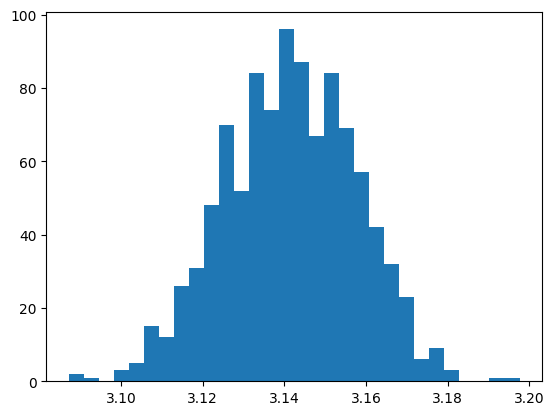

In [22]:
def pi_montecarlo(n, n_exp):
    pi_value_list = []
    n_exp = 1000
    for i in range(n_exp):
        n = 10000
        x = np.random.uniform(0,1,n)
        y = np.random.uniform(0,1,n)

        hypot_sqrd = x**2 + y**2
        count_in_circle = np.sum(hypot_sqrd <= 1)
        # count_out_circle = np.sum(hypot_sqrd > 1)

        pi = 4 * count_in_circle / n # pi is the ratio of the number of points inside the circle to the number of points inside the square (n)
        pi_value_list.append(pi)

    plt.hist(pi_value_list, bins=30)
    return np.mean(pi_value_list)

print("Computed pi value: ", pi_montecarlo(10000, 1000))

### 4.3. Student’s t-distributions
It is similar to the normal distribution but has shorter, fatter tails.

It’s used when sample sizes are small. As the sample size increases, the t-distribution converges to the
normal distribution.

Text(0.5, 1.0, 'Normal Distribution')

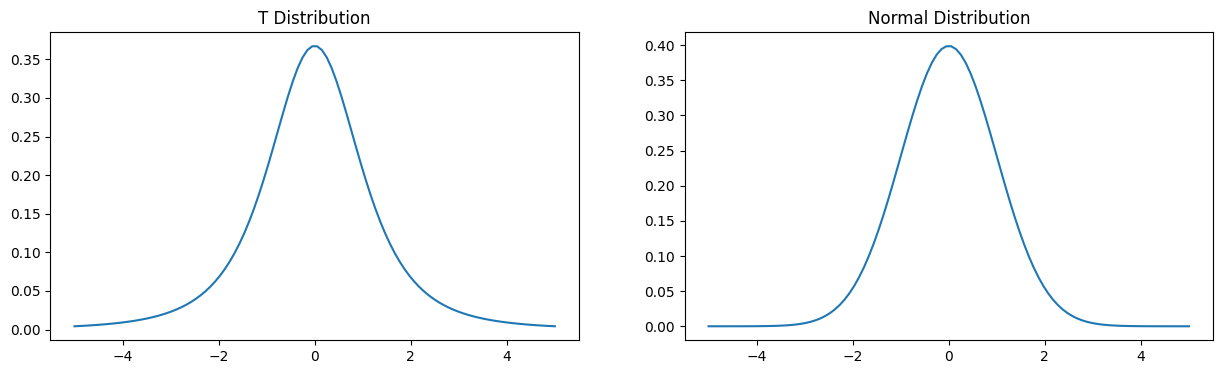

In [23]:
plt.figure(figsize=(15, 4))

# Subplot 1
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st position
x = np.linspace(-5, 5, 100)
y = stats.t.pdf(x, df=3)  # df = degrees of freedom
plt.plot(x, y)
plt.title('T Distribution')

# Subplot 2
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd position
x = np.linspace(-5, 5, 100)
y = stats.norm.pdf(x)
plt.plot(x, y)
plt.title('Normal Distribution')

### 4.4. Binomial Distribution
The binomial distribution models the number of successes in a fixed number of independent Bernoulli trials. 

A **Bernoulli trial** is a random experiment with two possible outcomes, usually success or failure.

The probability of success must be the same for each trial, and the trials must be independent of each other.

Example of applications in data science:
* **Modeling binary outcomes:** When dealing with experiments or processes that have exactly two possible outcomes (for example, pass/fail, on/off, and yes/no), the binomial distribution can be a perfect model.

* **Quality control and manufacturing:** In industries where the quality of products is critical, data scientists can use the binomial distribution to model the number of defective items in a batch. This aids in process optimization and quality assurance.

* **Marketing campaign analysis:** Data scientists can apply the binomial distribution to evaluate the success of marketing campaigns by analyzing the number of conversions (successes) versus non-conversions (failures) among targeted customers.

* **Healthcare research:** In medical trials, the binomial distribution can be used to model the number of patients responding positively to a treatment versus those who do not.

* **Sports analytics:** In sports, analyzing the number of wins and losses in a series of games can be modeled using the binomial distribution.

* **Election forecasting:** Predicting election outcomes based on sampled voter intentions, where voters can choose between two candidates, can also be represented with a binomial distribution.

#### 4.4.1. Example of election forecasting
Let's consider an example of election forecasting. We will work with datasets from 2012.

We will create a new variable called "obama_wins" that will be equal to 1 if Obama wins the state and 0 if he loses.
* P(X=1) = p = probability of Obama winning the state.
* P(X=0) = 1 - p = probability of Obama losing the state.

for p in the range 0 to 1 and stored in the column "obama_votes_%". p is the Bernoulli Parameter.

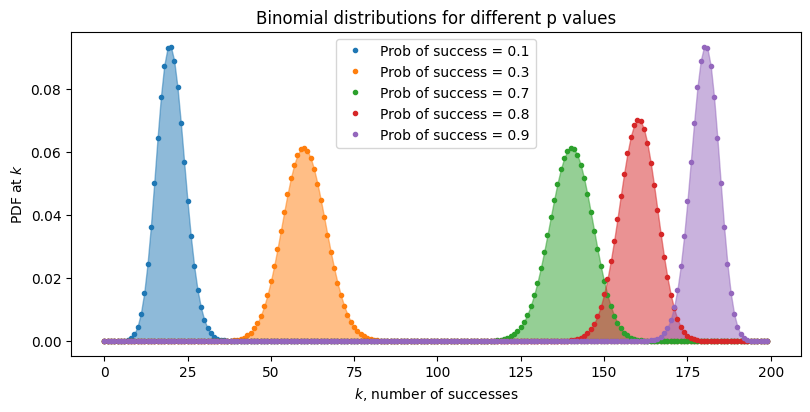

In [24]:
# Example on how to create and plot a random variable following a binomial distribution
n_trials = 200  # number of trials
k = np.arange(0, n_trials)  # number of successes in n trials

plt.figure(figsize=(8,4))
colors=sns.color_palette()
for p, color in zip([0.1, 0.3, 0.7, 0.8, 0.9], colors):
    rv = binom(n_trials, p)  # random variable with binomial distribution. p is the probability of success
    plt.plot(k, rv.pmf(k), '.', lw=2, color=color, label="Prob of success = {}".format(p))
    plt.fill_between(k, rv.pmf(k), color=color, alpha=0.5)
q=plt.legend()
plt.title("Binomial distributions for different p values")
plt.tight_layout()
q=plt.ylabel("PDF at $k$")
q=plt.xlabel("$k$, number of successes")

We will predict the outcome of the 2012 election based the estimated proportion of people in each state who identify with one one political party or the other.

We’ll build the model in the function vote_prediction_model, and return a forecast where the probability of an Obama victory is given by the probability that a sample from the "Democratic Advantage" Gaussian is positive.

(We assume that the "Democratic Advantage" is normally distributed according to the Central Limit Theorem.)

To calculate the probability, we need to find the area under the curve of a Gaussian that is on the positive side of the x-axis. The probability that a sample from a Gaussian with mean μ and standard deviation σ exceeds a threhold z can be found using the the Cumulative Distribution Function of a Gaussian:

CDF(z) = 0.5 * (1 + erf((z - μ) / (σ * sqrt(2))))  # 0.5 because we are interested in the positive side of the x-axis

where erf is the error function.

Above we calculated the sampling error of our dataset. However, we will consider it to be 3% for the purpose of this exercise.

We will apply the CLT, and assume that the sampling distribution of the Obama win percentage is a gaussian with mean = 0 and standard error the sampling error of 3%.
* σ = 3
* μ = 0

In [25]:
filepath = "us-elections-2012/Party_Affiliation_by_State.csv"
fullpath = os.path.join(mainpath, filepath)
data = pd.read_csv(fullpath)

data.head()

,State,Democrat/Lean Dem (%),Republican/Lean Rep (%),Democratic Advantage (ppt.),N,Unknown
0,District of Columbia,79.0,12.7,66.3,416.0,8.3
1,Rhode Island,52.5,26.5,26.0,623.0,21.0
2,Hawaii,54.3,28.7,25.6,466.0,17.0
3,New York,52.0,30.8,21.2,8674.0,17.2
4,Maryland,54.0,33.8,20.2,3571.0,12.2


In [26]:
from scipy.special import erf
def vote_prediction_model(data):
    sigma = 3
    prob =  .5 * (1 + erf(data["Democratic Advantage (ppt.)"] / np.sqrt(2 * sigma**2)))
    return pd.DataFrame(dict(Obama=prob), index=data.index)

In [27]:
model = vote_prediction_model(data)
model["state"] = data["State"]
model.head()

,Obama,state
0,1.0,District of Columbia
1,1.0,Rhode Island
2,1.0,Hawaii
3,1.0,New York
4,1.0,Maryland


In [28]:
filepath = "us-elections-2012/us_election_results_2012.csv"
fullpath = os.path.join(mainpath, filepath)
gt = pd.read_csv(fullpath)
gt["Obama_gt"] = (gt["obama_votes_%"] > 0.5).astype(float)
gt.head()

,state,total_votes,obama_votes,obama_votes_%,romney_votes,romney_votes_%,Obama_gt
0,Alabama,2074338,795696,0.384,1255925,0.605,0.0
1,Alaska,300495,122640,0.408,164676,0.548,0.0
2,Arizona,2299254,1025232,0.446,1233654,0.537,0.0
3,Arkansas,1069468,394409,0.369,647744,0.606,0.0
4,California,13038547,7854285,0.602,4839958,0.371,1.0


In [29]:
joined = model.join(gt.set_index("state"), on="state").dropna()
joined["Obama"] = (joined["Obama"] > 0.5).astype(float)

results = joined[["state", "Obama", "Obama_gt"]]
accuracy = np.mean(results["Obama"] == results["Obama_gt"])
print(f"Accuracy of preduction: {accuracy:.2f}")
results.head()

Accuracy of preduction: 0.82


,state,Obama,Obama_gt
1,Rhode Island,1.0,1.0
2,Hawaii,1.0,1.0
3,New York,1.0,1.0
4,Maryland,1.0,1.0
5,Massachusetts,1.0,1.0


### 4.5. Poisson Distribution

The Poisson distribution is the probability of a given number of (discrete) independent events happening in a fixed interval of time, and is commonly used in queuing theory, which answers questions like: 
* “How many customers are likely to purchase tickets within the first hour of announcing a concert?”

When using this distribution, a data scientist must remember the following aspects:
* The events are independent of each other.
* These must be discrete events, meaning that events occur one at a time.
* These events must occur with a known constant mean rate ( λ ).

If a random variable X follows a Poisson distribution, then the probability that X = k successes can be found by the following formula:

P(X=k) = (λ^k  * e^– λ )/ k!
    
Where:
* P(X=k) is the probability of k successes,
* λ is the average rate of success,
* e is Euler’s number (approximately 2.71828),
* k is the number of successes


Example of applications in data science:
* **Call center modeling:** model the number of calls a call center receives in an hour based on historical data, assuming a constant average rate.
* **Website traffic analysis:** Analyzing the number of hits or visits to a web page within specific
time intervals can be modeled using the Poisson distribution.
* **Natural events:** Studying the number of earthquakes in a particular region over a year or
the number of meteorites of a certain size hitting the Earth in a century are examples of Poisson processes.
* **Service systems:** The number of customers arriving at a bank or a gas station in a fixed period
can be modeled with the Poisson distribution.
* **Healthcare**: In medicine, a Poisson distribution might be used to model the number of occurrences of particular incidents, such as the number of births in a hospital in a day.
* **Quality control:** In manufacturing, it might describe the number of defects found in a particular
sample of items

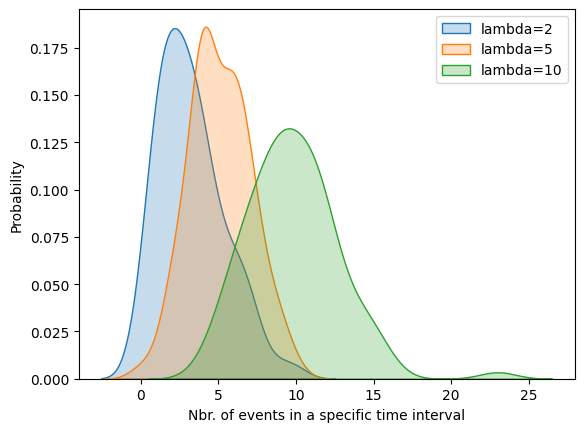

In [30]:
# Generate random values from Poisson distribution with mean=3 and sample size=100
sample1 = poisson.rvs(mu=3, size=100)
sample2 = poisson.rvs(mu=5, size=100)
sample3 = poisson.rvs(mu=10, size=100)

# Create plot of Poisson distribution
sns.kdeplot(x=sample1, fill=True, label='lambda=2')
sns.kdeplot(x=sample2, fill=True, label='lambda=5')
sns.kdeplot(x=sample3, fill=True, label='lambda=10')
plt.xlabel('Nbr. of events in a specific time interval')
plt.ylabel('Probability')
plt.legend()
plt.show()

Lets use the Poisson Distribution to solve real questions.

A hospital gets 3 patients in the ICU per day on average (we have a data history)

In [31]:
print("What is the probability that there will be 5 patients coming in tomorrow?")
print(poisson.pmf(k=5, mu=3))

print("What is the probability that there will be 4 or less patients coming in tomorrow?")
print(poisson.cdf(k=4, mu=3))

print("What is the probability that there will be 2 or more patients coming in tomorrow?")
print(1-poisson.cdf(k=2, mu=3))

What is the probability that there will be 5 patients coming in tomorrow?
0.10081881344492458
What is the probability that there will be 4 or less patients coming in tomorrow?
0.8152632445237722
What is the probability that there will be 2 or more patients coming in tomorrow?
0.5768099188731564


### 4.6. Exponential distribution
An exponential distribution is another commonly used continuous probability distribution which allows us to model the amount of time between two consecutive events.

It is an extension of Poisson distribution. Suppose we are using Poisson to model the number of messages in a given time period. What if we wanted to understand the time interval between messages?

Assumes:
* The events occur at a constant rate λ. 
* Each event is independent of each other.

It is often used to model waiting times and lifetimes of certain processes.

We know from the Poisson distribution that lambda (λ) is the average rate at which an event occurs (number of events per unit time). From this, it follows that the average time between 2 events is (1/λ), which is the mean of exponential distribution 

Note: *mean = expected value = integrate the product of the variable and its probability density function 1 over its entire range*.

The probability density function (pdf) for an exponential distribution is given by the equation:

f(x;λ) = λ * e^–λx for x ≥ 0, 0 otherwise

Where:
* f(x;λ) is the probability of time between 2 events being x units
* λ = average rate at which an event occurs (number of events per unit time).
* x = random variable (time between 2 events)

Example of applications in data science:
* **Lifetime modeling:** The exponential distribution is used to model the lifetime of products, machinery, and electronic components, representing the time until the first failure.
* **Service systems:** It can describe the time between consecutive arrivals of customers in a system, such as a bank or a call center.
* **Natural phenomena:** The time between occurrences of certain types of natural events, such as earthquakes or meteor showers, can be modeled with the exponential distribution.
* **Medical research:** It can be used to model the time between successive occurrences of an event, such as the intervals between heartbeats or the time until the onset of a specific disease.

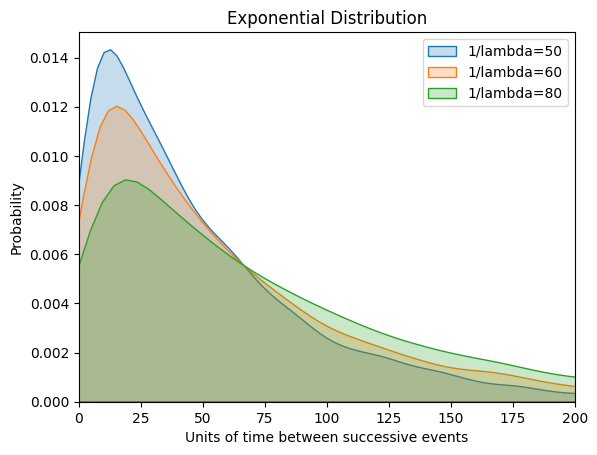

In [32]:
# When average time between 2 messages is 50 seconds
data1 = expon.rvs(scale=50, size=10000)  # scale is 1/lambda

# When average time between 2 messages is 60 seconds
data2 = expon.rvs(scale=60, size=10000)

# When average time between 2 messages is 80 seconds
data3 = expon.rvs(scale=80, size=10000)

# Plot sample data
sns.kdeplot(x=data1, fill=True, label='1/lambda=50')
sns.kdeplot(x=data2, fill=True, label='1/lambda=60')
sns.kdeplot(x=data3, fill=True, label='1/lambda=80')
plt.xlabel('Units of time between successive events')
plt.ylabel('Probability')
plt.title('Exponential Distribution')
plt.legend()
plt.xlim(0, 200)
plt.show()

# The exponential distribution has an extreme right skew, dragging the mean towards the right 
# side of the peak. As (1/λ) increases, the skewness also increases and the mean moves further
# away from the peak.

Lets solve some problems in exponential distribution.

1. Suppose the average number of minutes between clicks on a banner advertisement is 8 minutes.

In [33]:
print("What is the probability that we’ll have to wait less than 5 minutes for a click?")
print(expon.cdf(x=5, scale=8))  # probability that x is <= 5 when mean is 8

What is the probability that we’ll have to wait less than 5 minutes for a click?
0.4647385714810097


2. Your website receives 250 visitors per hour on average (assume poisson distribution). 

In [34]:
# Claculate avg visitors per second
rate = 250/3600
print("What is the probability of waiting more than 15 seconds for the next visitor?")
print(1 - expon.cdf(x=15, scale=1/rate))  # probability that x is > 15 when mean is 1/rate

What is the probability of waiting more than 15 seconds for the next visitor?
0.3528660814588489


### 4.7. Geometric distribution
Geometric distribution models the number of independent Bernoulli trials needed before observing the first success. 

For example, in basketball, if a player has a 70% chance of making a free throw (p=0.7), we can use the geometric distribution to calculate the probability of the player making the first free throw on their second attempt. 

We must assume that:
    * Each trial has two possible outcomes (success or failure).
    * The trials are independent.
    * The probability of success is constant.

Note: 
* Binomial distribution models the number of successes in n trials.
* Geometric distribution models the number of trials needed to get the first success.

The probability mass function (pmf) of the geometric distribution is given by the formula:

P(X=k) = (1-p)^(k-1) * p

Where:
* P(X=k) is the probability of k trials needed to get the first success,
* p is the probability of success. 0 < p ≤ 1,
* k is the number of trials needed to get the first success.

Example of applications in data science:
* **Reliability analysis:** model the number of uses of a product until it fails for the first time. This might be applied in industrial contexts to understand product longevity.
* **Marketing campaigns:** In marketing, this distribution might be used to model the number of contacts required to make the first sale to a new customer.
* **Medical trials:** In healthcare, it could represent the number of trials needed to achieve the first successful treatment in a series of independent treatments.
* **Ecology:** In environmental studies, it might describe the number of species sampled until the first endangered species is found.
* **Quality control in manufacturing:** The geometric distribution can model the number of items inspected until the first defective item is found.

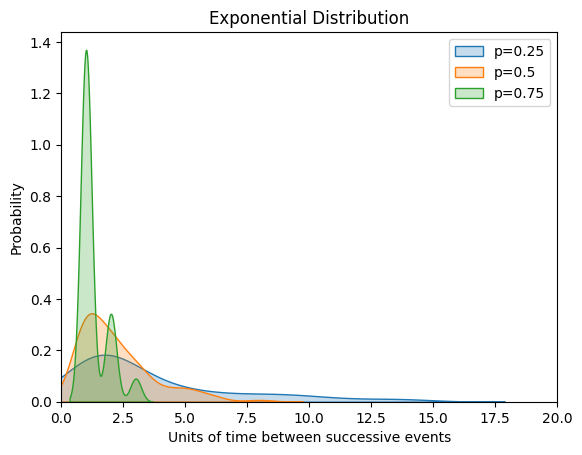

In [35]:
data1 = geom.rvs(p=0.25, size=100)
data2 = geom.rvs(p=0.5, size=100)
data3 = geom.rvs(p=0.75, size=100)

# Plot sample data
sns.kdeplot(x=data1, fill=True, label='p=0.25')
sns.kdeplot(x=data2, fill=True, label='p=0.5')
sns.kdeplot(x=data3, fill=True, label='p=0.75')
plt.xlabel('Units of time between successive events')
plt.ylabel('Probability')
plt.title('Exponential Distribution')
plt.legend()
plt.xlim(0, 20)
plt.show()

Lets see an example of the geometric distribution.:

Imagine you are a 32 year old woman doing an IVF treatment. The probability of getting pregnant in one IVF cycle is 0.3.

*Note: In vitro fertilization (IVF) is a fertility treatment that involves fertilizing an egg with sperm in a laboratory and then placing the resulting embryo in the woman's uterus.*

In [36]:
print("What is the probability of getting pregnant in the 3rd IVF cycle?")
print(geom.pmf(k=3, p=0.3))

print("What is the probability of getting pregnant in the first 5 cycles?")
print(geom.cdf(k=5, p=0.3))  # probability that x is <= 5 when p is 0.3

What is the probability of getting pregnant in the 3rd IVF cycle?
0.14699999999999996
What is the probability of getting pregnant in the first 5 cycles?
0.8319300000000001


### 4.8. Weibull distribution
Weibull distribution is a versatile distribution that’s used in reliability engineering and survival analysis. 

It can model various shapes, including exponential, and is often used to model time until a given technical device fails, among other applications. Its flexibility is afforded by two parameters instead of just 1: scale (𝜆) and shape (k).

Example of applications in data science:
* **Survival analysis:** In medical research, it’s often used to model the time until the occurrence of certain events, such as the time until death in a population of patients with a specific disease
* **Weather forecasting:** It can be used to model wind speeds to help with designing wind turbines or predicting storm damages
* **Economics and Finance:** Some economic and financial phenomena that do not follow the normal distribution may be modeled using the Weibull distribution.
* **Quality control in manufacturing:** It can model various aspects of the manufacturing process, such as the time until the first failure of a product.

### 4.9. Summary of Probability Distribution Functions

| Distribution | Description | Parameters | Example/Note |
| --- | --- | --- | --- |
| Uniform | All outcomes are equally likely | None | Rolling a fair dice |
| Normal, Gaussian or Z distribution | Bell-shaped distribution, symmetric about the mean | Mean (μ), std (σ)| A related concept is the z-score, which measures how many stds a given data point is from the mean |
| Student’s t | Similar to normal distribution but with shorter, fatter tails | Degrees of freedom (df) | Small sample sizes |
| Binomial | Models the number of successes in a fixed number of independent Bernoulli trials | Number of successes (k), Number of trials (n), probability of a single success (p)| Election forecasting |
| Poisson | Models the number of independent events happening in a fixed interval of time | Average rate of success | Hospital ICU patients |
| Exponential | Models the amount of time between two consecutive events | Average rate of success | Time between clicks on a banner advertisement |
| Geometric | Models the number of independent Bernoulli trials needed before observing the first success | Probability of success | IVF cycles |
| Weibull | Used in reliability engineering and survival analysis | Scale, shape | Time until a technical device fails |

## 5. Testing hypotheses
Hypothesis testing is a statistical method that’s used to make inferences about population parameters based on sample data. It involves formulating two competing hypotheses – the null hypothesis (H0) and the alternative hypothesis (H1) – and then using sample data to determine which hypothesis is more likely to be true.

* The null hypothesis (H0) is a statement that there is no significant difference or effect, and any observed differences are due to random chance.
* The alternative hypothesis (H1) is a statement that there is a significant difference or effect, and the observed differences are not due to random chance.

--> Hypothesis Testing is a type of statistical analysis in which you put your assumptions about a population parameter to the test.

The hypothesis testing procedure involves the following steps:
1. Formulate the null hypothesis and the alternative hypothesis.
2. Randomly sample the population and calculate the appropriate test statistic (for example, t-statistic, z-score, or chi-squared statistic) from the sample.
3. Determine the appropriate probability distribution for the test statistic under the assumption that the null hypothesis is true.
4. Find the p-value, which is the probability of observing a test statistic as extreme as the one obtained, assuming the null hypothesis is true (the p-value measures the strength of the evidence against the null hypothesis).
5. Compare the p-value to a pre-determined significance level (alpha) to make a decision. In the data science industry, it is common to use a significance level of 5%. Therefore, if your p-value is below 5%, we reject the null hypothesis. If it is greater than the 5% threshold, we fail to reject the null hypothesis.
    * If p-value < alpha (0.05): Reject the null hypothesis and accept the alternative hypothesis.

### 5.1. One-sample t-tests
A one-sample t-test is a statistical procedure that compares the mean of a sample to a predetermined value to determine whether the observed difference is statistically significant or if it likely occurred due to chance alone.

For example, suppose we want to verify that the average male sea otter population in the Pacific Northwest of the US is maintaining a healthy weight, which we hypothesize to be 75 lbs. Since it’s impractical to measure the entire population, we collect a sample of 50 male sea otters. Then, we calculate the sample mean and standard deviation. These values are used to compute a t-statistic, which will help us determine if the population mean is statistically significantly different from 75 lbs.

### 5.2. Two-sample t-tests
A two-sample t-test determines whether there is a statistically significant difference between the means in two unrelated groups. 

For example, consider comparing the mean number of hours spent emailing per week by married respondents (population 1) and single respondents (population 2). The “Email Hours Per Week” variable is the test variable.

The independent samples t-test examines whether the difference between the mean number of hours married respondents spent emailing, and the mean number of hours single respondents spent emailing, is significantly different. To do this, we take samples from each population and compare their distributions. Are they significantly different? When in doubt, it’s best to use an independent-sample t-test. This is appropriate for "between-subjects“ designs where two groups of subjects are intended to differ on a critical manipulation.


**Practical example:**

Suppose we want to investigate whether there is a significant difference in the test scores of two study groups, Group A and Group B. Each group consists of different students, and the two groups were taught using different teaching methods.

We want to determine if there is a statistically significant difference in their average test scores. The hypothesis statements are as follows:
* Null hypothesis: There is no significant difference between the average test scores of Group A and Group B ( μ A - μ B = 0)
* Alternative hypothesis: There is a significant difference between the average test scores of Group A and Group B ( μA − μB ≠ 0 )



In [37]:
# test scores:
group_a = [78, 86, 88, 92, 75, 82, 80, 85, 89, 94] 
group_b = [72, 79, 84, 90, 81, 76, 88, 80, 83, 91, 85, 87]

# Calculate the T-test for the means of two independent samples of scores.
ttest = stats.ttest_ind(group_a, group_b, equal_var=True)  #  equal_var=True assumes equal population variances
print(ttest.statistic)
print(ttest.pvalue)
print("H1 hypothesis: there is a difference between the two learning methods")
print("H1 hypothesis is confirmed: ", ttest.pvalue < 0.05)

0.7517313271772694
0.4609681461099103
H1 hypothesis: there is a difference between the two learning methods
H1 hypothesis is confirmed:  False


### 5.3. Paired sample t-tests

A paired sample t-test is a statistical procedure that  determines whether the mean difference between two sets of observations is zero. The two sets of observations are typically dependent on each other – for example, the same set of individuals measured at two different time points or under two different conditions.

This test is applicable when you have two quantitative measurements, and these measurements are paired or related in some way. The “pairing” refers to the fact that each data point in one dataset is uniquely linked to a data point in the other dataset.

--> In other words, there’s a one-to-one correspondence between the values in the two sets.

Assumptions:
* Two samples are related or matched in some way. --> one-to-one correspondence between the values in the two sets.
* The null hypothesis = the true mean difference between the paired samples is zero.
* The differences between pairs mean follow a roughly normal distribution.

Examples:
* Before-and-after observations: Here, the same individuals, items, or events are measured before and after a treatment or intervention – for instance, measuring student test scores before and after an educational program.
* Matched pairs: The pairs of observations come from two distinct groups, but each pair is matched or related in some way, such as twins, paired geographical locations, or matched units.

### 5.4. ANOVA and MANOVA
Analysis of Variance (ANOVA) and Multivariate Analysis of Variance (MANOVA) are powerful statistical tests that are often utilized by data scientists to analyze the differences among group means and their associated procedures. 

They offer an extension of the two-sample t-test to scenarios with more than two groups or variables.

#### ANOVA
ANOVA compares the means of three or more independent groups to test if they are significantly
different from each other.
* H0 = The means of the groups are equal (μ1 = μ2 = μ3 = … = μk)
* H1 = At least one group mean is different

Conditions:
* The dependent variable is continuous. The dependent variable is the variable you are measuring.
* The independent variable is categorical with at least 3 categories.
* The observations are independent, normally distributed, and have equal variances.


PRACTICAL EXAMPLE: Conducting a One-Way ANOVA test 
Researchers took 5 cars of the same model to take part in a study. These cars are randomly doped with one of the four-engine oils and allowed to run freely for 100 kilometers each. At the end of the journey, the performance of each of the cars is noted.

In [38]:
# Performance of the cars for each oil type
performance1 = [89, 89, 88, 78, 79]  # for engine oil_1
performance2 = [93, 92, 94, 89, 88]  # for engine oil_2
performance3 = [89, 88, 89, 93, 90]  # for engine oil_3
performance4 = [81, 78, 81, 92, 82]  # for engine oil_4

# Conduct the one-way ANOVA
anova_test = f_oneway(performance1, performance2, performance3, performance4)
print("At least one group mean is different from the others?")
print("H1 hypothesis is confirmed: ", anova_test.pvalue < 0.05)

At least one group mean is different from the others?
H1 hypothesis is confirmed:  True


#### MANOVA
MANOVA, an extension of ANOVA, is used when there are two or more dependent variables.

MANOVA is a statistical test that evaluates whether there are significant differences in the means of multiple dependent variables across groups defined by an independent variable.

Finding significant differences between groups defined by the independent variables with respect to a set of dependent variables is the main objective of a MANOVA.

* H0 = there are **no** significant differences in the multivariate response among independent variables.
* H1 = there are significant differences in the multivariate response among independent variables.

Conditions:
* There are 2 or more continuous dependent variables.
* The independent variable is categorical with at least 3 categories.
* The observations should meet the assumptions of multivariate normality and homogeneity
of variance-covariance matrices

Advantages:
* Simultaneous Testing: By enabling you to compare many dependent variables at once, MANOVA can help lower the possibility of Type I errors that might arise from running individual univariate tests for each variable.

Disadvantages:
* Results that are not trustworthy may arise from breaking these presumptions.
EXAMPLE:

In [39]:
# Load the iris dataset
data = load_iris()  # Iris dataset stores information about 150 iris flowers from 3 different species
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target
# Rename columns to remove spaces
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
# Replace target numbers with their respective names for clarity in results
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [40]:
# Apply MANOVA with the renamed columns
# sepal_length + sepal_width + petal_length + petal_width are the dependent variables
# species is the independent variable

manova = MANOVA.from_formula('sepal_length + sepal_width + petal_length + petal_width ~ species', data=df)
# Tests whether the dependent variables differ significantly across the groups defined by the species variable.
result = manova.mv_test()
# H1: there are significant differences in the multivariate response among the species.
print(result)

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0170 4.0000 144.0000 2086.7720 0.0000
         Pillai's trace  0.9830 4.0000 144.0000 2086.7720 0.0000
 Hotelling-Lawley trace 57.9659 4.0000 144.0000 2086.7720 0.0000
    Roy's greatest root 57.9659 4.0000 144.0000 2086.7720 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
        species          Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0234 8.0000 288.0000  199.1453 0.0000
         Pillai's trace  1.1919 8.0000 290.00

***Lets explain the above table:***
Two sections are presented:

* Intercept: tests whether the mean values of the four measurements (sepal length, sepal width, petal length, petal width) across all iris species are significantly different from zero. If this is the case, we conclude that the measurements of the flowers are not random noise 
* species: Tests whether the dependent variables differ significantly across the groups defined by the species variable. --> this is more interesting than the intercept.

For both sections, four multivariate test statistics are computed. Here we explain two of them:
1. Wilks’ Lambda: 
    * Measures the proportion of variance in the dependent variables not explained by the independent variables.
    * Smaller values indicate stronger evidence against the null hypothesis.
2. Pillai’s Trace:
    * Summarizes the contribution of the independent variables to explaining the variance in the dependent variables.
    * Larger values indicate stronger evidence against the null hypothesis.

--> The MANOVA test confirms that the species significantly influence the multivariate response. 

### 5.5. Chi-squared tests (χ² test)
The Chi-Square Test is a statistical method used to find out if there is a significant association between two categorical variables.

There are two types of chi-squared tests:
* **Chi-squared test of independence:** Assesses if there is a significant association between two
categorical variables.
* **Chi-squared test of goodness-of-fit test:** Determines if the observed frequencies for a categorical variable match an expected set of frequencies.

#### Chi-squared test of independence
* H 0 : The variables are independent.
* H a : The variables are not independent.

The chi-squared test of independence is appropriate under the following conditions:
* Variables: Both variables are categorical (nominal).
* Observations: Observations are independent, meaning each participant contributes only to
one cell within the chi-squared table.
* Assumption: 
    * sufficiently large sample size. 
    * Generally, all expected frequencies should be at least 5.

#### Chi-squared test of goodness-of-fit
The chi-squared goodness of fit test evaluates the null hypothesis ( H 0 ) to see whether the observed
frequency distribution of a categorical variable matches an expected frequency distribution. The
alternative hypothesis ( H a ) states that the observed distribution does not fit the expected distribution.
We can represent this symbolically:
* H 0 : Observed frequencies = expected frequencies
* H a : Observed frequencies ≠ expected frequencies

This test is suitable when the following conditions are met:
    * Variable: The variable under consideration is categorical
    * Observations: Observations are independent
    * Assumption: All expected frequencies are at least 5

|  | Chi-Square Test of Independence | Chi-Square Test of Goodness-of-Fit |
| --- | --- | --- |
| Number of variables | 2 | 1 |
| Purpose of test | To determine if two categorical variables are independent | Decide if one variable is likely to come from a given distribution or not |
| Hypothesis example | * Ho: proportion of people who buy snacks is independent of the movie type * Ha: proportion of people who buy snacks is different for different types of movies | * Ho: proportion of flavors of candy are the same. * Ha: proportions of flavors are not the same |

Lets see an example.
We will use the Python Chi-Square test on data collected from two Portuguese schools, to find out the effective factors on the success of Math lessons, from school support to family backgrounds. 

In [41]:
filepath = "portuguese-school/student-mat.csv"
fullpath = os.path.join(mainpath, filepath)
data = pd.read_csv(fullpath, sep=";")  # Load the data

data.head() # Show the first 5 rows of the data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [42]:
# data exploration
data.info()  # Show the data type of each column and the number of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [43]:
data.describe()  # Show the summary statistics of the data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


As we said earlier, the data is gathered from two Portuguese schools and includes both academic and personal information of students.

**Recorded Attributes:**
* Demographic Information Includes age, sex, etc.
* School-Related Features Covers study time, failures, etc.
* Social Aspects Encompasses family size, parent's job, etc.
* Academic Grades G1, G2, and G3, where G3 is the final year grade, and G1 and G2 are the grades from the 1st and 2nd periods.

**About statistics:**
* Age: Students are between 15 and 22 years old, with an average age of about 16.7.
* Study Time: On average, students spend about 2 hours per week studying, with a standard deviation of 0.84 hours.
* Academic Failures: The average number of failures is 0.33.
* Grades (G1, G2, G3): The average grades for the 1st, 2nd, and final period (G1, G2, G3) hover around 10.9, 10.7, and 10.4, respectively.

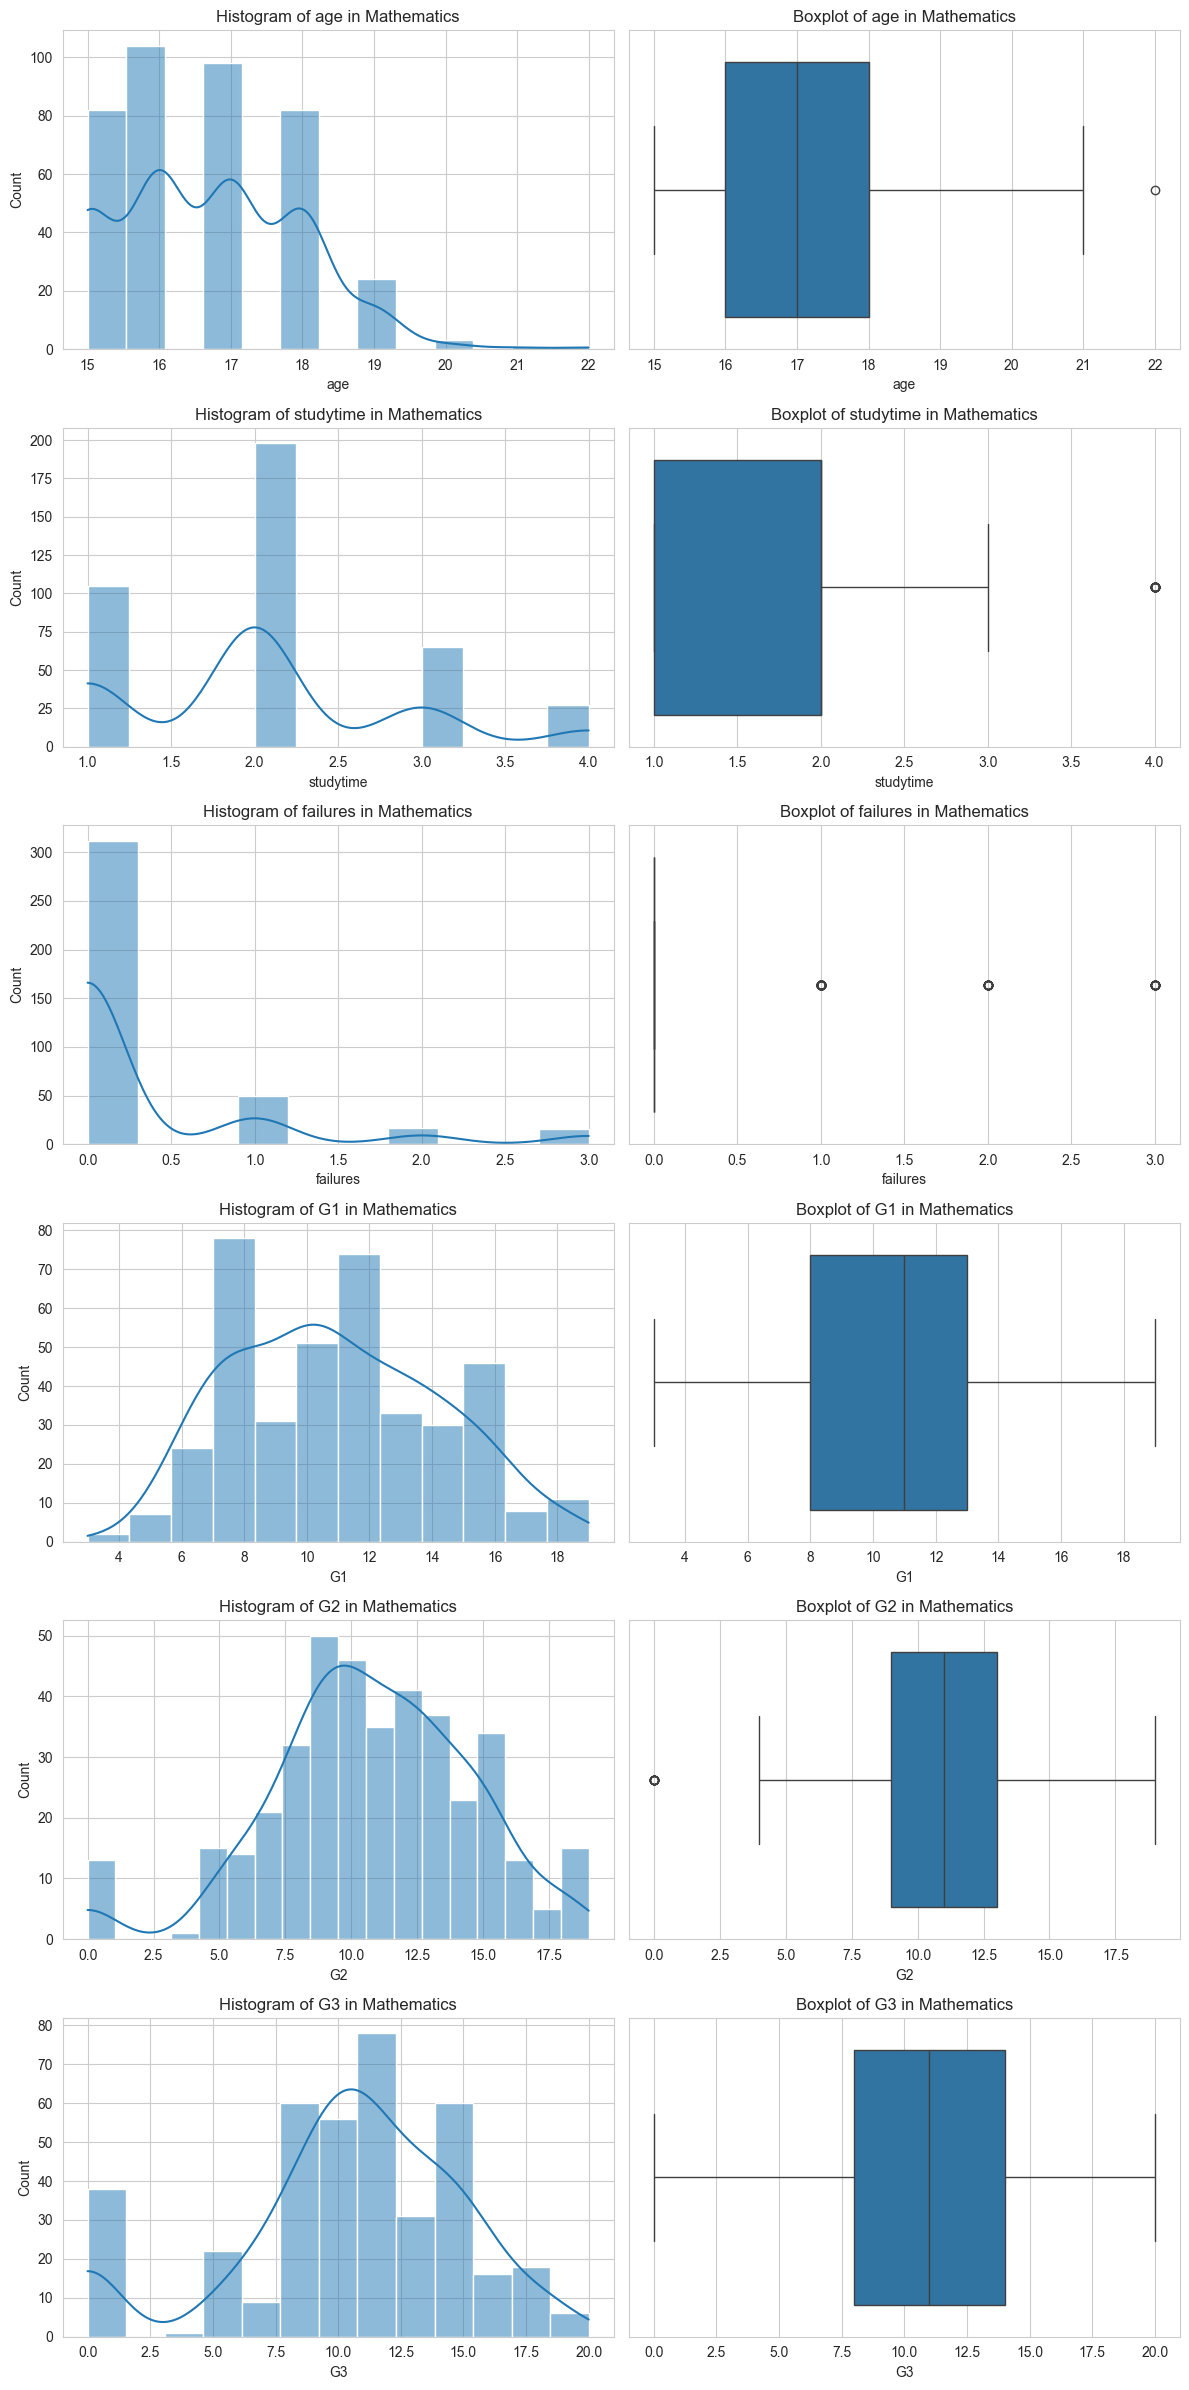

In [44]:
# Data visualization:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Defining a function to create histograms and boxplots for specified columns
def plot_histograms_boxplots(data, columns, dataset_name):
    fig, axes = plt.subplots(len(columns), 2, figsize=(12, 4 * len(columns)))
    for i, col in enumerate(columns):
        # Histogram
        sns.histplot(data[col], kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'Histogram of {col} in {dataset_name}')
        # Boxplot
        sns.boxplot(x=data[col], ax=axes[i, 1])
        axes[i, 1].set_title(f'Boxplot of {col} in {dataset_name}')
    plt.tight_layout()

# Columns of interest for both datasets
columns_of_interest = ['age', 'studytime', 'failures', 'G1', 'G2', 'G3']

# Plotting for Mathematics dataset
plot_histograms_boxplots(data, columns_of_interest, 'Mathematics')

**Insights:**
* Age: Most students are between 15-18 years old, with a few older students.
* Study Time: A large number of students study for 1-2 hours per week.
* Failures: Most students have no failures, with a few having one or more.
* Grades (G1, G2, G3): The grades are normally distributed, with some outliers, particularly in G2 and G3.

**Now is time for the chi-squared test**. It will help us understand if there are important relation between categorical variables in our datasets.

In [45]:
# Defining a function to perform the Chi-Square Test and interpret results
def perform_chi_square_test(data, col1, col2):
    # Creating a contingency table
    contingency_table = pd.crosstab(data[col1], data[col2])

    # Performing the Chi-Square Test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Interpreting the result
    significant = p < 0.05  # 5% significance level
    return chi2, p, significant

# Additional aspects to test in the Mathematics dataset
additional_aspects_to_test = {
    'School Support and Academic Performance': ('schoolsup', 'G3'),
    'Family Support and Grades': ('famsup', 'G3'),
    'Extra-Curricular Activities and Performance': ('activities', 'G3'),
    'Romantic Relationships and Academic Performance': ('romantic', 'G3'),
    'Health Status and Grades': ('health', 'G3')
}
# Performing the additional tests for Mathematics dataset
additional_mat_chi_square_results = {aspect: perform_chi_square_test(data, *columns) for aspect, columns in additional_aspects_to_test.items()}
additional_mat_chi_square_results

{'School Support and Academic Performance': (32.51747698036442,
  0.012967250942184287,
  True),
 'Family Support and Grades': (13.691883206082325, 0.688779619694134, False),
 'Extra-Curricular Activities and Performance': (15.476362071640207,
  0.5612107675941844,
  False),
 'Romantic Relationships and Academic Performance': (30.172481594103168,
  0.025127664064858564,
  True),
 'Health Status and Grades': (69.21650199423279, 0.43611751736038123, False)}

In [46]:
contingency_table = pd.crosstab(data['health'], data['G3'])
contingency_table  # how many values with health = 3 and G3 = 10 --> see table and find the value (16)

G3,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
health,,,,,,,,,,,,,,,,,,
1,2,1,1,1,0,4,1,7,5,1,5,4,8,1,2,2,2,0
2,7,0,0,3,0,2,3,8,2,2,4,6,2,2,0,2,1,1
3,8,0,2,3,3,8,7,16,13,11,4,5,4,4,1,1,1,0
4,8,0,1,1,3,5,6,11,7,3,5,5,3,3,1,3,1,0
5,13,0,3,7,3,13,11,14,20,14,13,7,16,6,2,4,0,0


Let’s evaluate the results.

* **School Support and Academic Performance:** The Chi-Square value is 32.52 with a p-value of 0.013. This indicates a significant association between school support services and student grades.

* **Family Support and Grades:** The Chi-Square value is 13.69 with a p-value of 0.69, suggesting no significant impact of family support on academic performance.

* **Extra-Curricular Activities and Performance:** The Chi-Square value is 15.48 with a p-value of 0.56, indicating no significant effect of participation in extra-curricular activities on grades.

* **Romantic Relationships and Academic Performance:** The Chi-Square value is 30.17 with a p-value of 0.025, showing a significant association between being in a romantic relationship and student grades.

* **Health Status and Grades:** The Chi-Square value is 69.22 with a p-value of 0.44, suggesting no significant impact of health status on academic performance.

### 5.6. A/B tests
An A/B test randomly assigns subjects to one of two groups: the control group (A), which receives the “business as usual” version, and the experimental group (B), which gets the version with the modification. The performance of the two groups is then compared to see if the modification resulted in any statistically significant improvement.

* H 0 : There is no significant difference between the control and experimental groups.
* H a : There is a significant difference between the control and experimental groups.

Example: we randomly divide a population of users into two groups. We show to one of them the old version of a website and to the other the new version. We want to know if the new version is better than the old one.

A/B testing is most applicable in scenarios where you are testing a single modification between two versions. Some of the common conditions are as follows:
* Controlled experiment: You can control and randomly assign subjects to groups A or B.
* Single-variable testing: You’re testing a single change (for example, different headlines, page layouts, and color schemes).
* Clear metrics: There is a clear metric to measure success (for example, click-through rate, time spent on a page, purchase made, and so on)

Steps:
1. **Determine the element you want to test** (for example, the color of a button, the length of a sales email, and so on).
2. **Formulate hypotheses:** Establish the null and alternative hypotheses.
3. **Split the sample:** Randomly assign your subjects to two groups, A (control) and B (treatment).
4. **Collect and analyze data:** Record the performance metric for each group, then compare the results to see if there is a statistically significant difference.
5. **Statistical test:** Perform a statistical test (such as a **two-sample t-test**) to check the significance of the difference.
6. **Make a decision:** If the p-value from your statistical test is less than your pre-set significance level (usually 0.05), reject the null hypothesis, concluding that your modification made a
significant difference.

## 6. Type I and Type II error
* **Type I error (false positive)** occurs when we reject the null hypothesis when it is true (this is also known as a false positive). The **probability of committing a Type I error is denoted by** the Greek letter **alpha (α)**, which corresponds to the significance level set for the test. If α is set to 0.05, for instance, we are willing to accept a 5% chance of committing a Type I error.

* **Type II error (false negative)** occurs when we fail to reject the null hypothesis when it is false (this is also known as a false negative). The **probability of committing a Type II error is represented by the Greek letter beta (β)**. **(1-β)** is called the **power of the test**, which is the probability of correctly rejecting a false null hypothesis. Hence, increasing the power of a test decreases the chances of committing a Type II error.

![Type I and Type II error](https://itfeature.com/wp-content/uploads/2024/04/Type-I-and-type-II-Errors-in-hypothesis-testing.jpg)

* **Striking a balance:** The probabilities of committing Type I and Type II errors are inversely related. **Reducing the risk of a Type I error (by choosing a smaller α) increases the risk of a Type II error, and vice versa.** The key is finding the right balance between these two risks, and this balance depends on the context of the test and the potential implications of each type of error.

Lets see an example:
In the context of a legal trial, where the null hypothesis is that the defendant is innocent (not guilty),
1. Can you explain what a Type I and a Type II error would correspond to and which one is considered
more severe in this context?
2. Describe how the chosen significance level (alpha, α) can impact Type I and Type II errors in a
hypothesis test. What trade-offs might you have to consider when choosing the significance level?

ANSWER:
1. In the context of a legal trial:
* Type I error (false positive): Convicting an innocent person (rejecting the null hypothesis when it is true).
* Type II error (false negative): Acquitting a guilty person (failing to reject the null hypothesis when it is false).

In this context, a Type I error (convicting an innocent person) is considered more severe because it results in an unjust punishment for an innocent individual.

2. The significance level, denoted by alpha (α), is the probability of rejecting the null hypothesis when it is true, that is, of commiting a Type I error or convicting an innocent person. 

* A lower significance level (α) reduces the probability of a Type I error but increases the probability of a Type II error.

Since Type I error is more severe, we must prioritize a higher significance level to minimize the risk of convicting an innocent person.